<a href="https://colab.research.google.com/github/Dwikyoy/Project-_akhir_SDS/blob/main/simulasi_SVIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import packages
import scipy.integrate
import numpy
import matplotlib.pyplot as plt


In [28]:
#ODEs
def SVIR_model(y, t, delta, epsilon, beta, rho, mu, theta, gamma):
  s, v, i, r= y

  ds_dt = delta+epsilon*r-beta*s*i-rho*s-mu*s
  dv_dt = rho*s-theta*v*i-mu*v
  di_dt = beta*s*i+theta*v*i-gamma*i-mu*i
  dr_dt = gamma*i-epsilon*r-mu*r

  return([ds_dt, dv_dt, di_dt, dr_dt])


In [29]:
#kondisi awal
s0 = 0.6
v0 = 0.06
i0 = 0.17
r0 = 0.0
delta = 0.0682
beta = 0.6
rho = 0.75
mu = 0.0682
theta = 0.05
gamma = 0.09
epsilon = 0.0012

#Vector waktu
t = numpy.linspace(0, 100, 100000)

#result
solution = scipy.integrate.odeint(SVIR_model, [s0, v0, i0, r0], t, args=(delta, epsilon, beta, rho, mu, theta, gamma))
solution = numpy.array(solution)


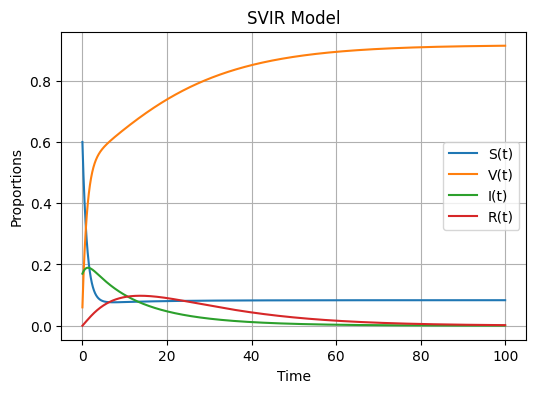

In [30]:
plt.figure(figsize=[6, 4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="V(t)")
plt.plot(t, solution[:, 2], label="I(t)")
plt.plot(t, solution[:, 3], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SVIR Model")
plt.show()